## Stroke Predictor ##

#### Life cycle of Machine learning Project ####
* Understanding the Problem Statement
* Data Collection
* Data Checks to perform
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose best model


### 1) Problem statement ###
This project predicts the likelihood of a patient getting stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

### 2) Data Collection ###
Dataset Source - https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
The data consists of 12 column and 5110 rows.

### 2.1 Import Data and Required Packages ###
#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library. ####

In [246]:
pip install catboost

  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 2.4 MB/s eta 0:00:0000:0100:01
Using cached graphviz-0.20.3-py3-none-any.whl (47 kB)
Note: you may need to restart the kernel to use updated packages.


In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
#Modelling
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
#from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


In [19]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [21]:
df.shape

(5110, 12)

### 2.2 Dataset information ###
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke orical column



### 3. Data Checks to perform ###

 * Check Missing values
 * Check Duplicates
 * Check data type
 * Check the number of unique values of each column
 * Check statistics of data set
 * Check various categories present in the different categorical column

#### 3.1 Missing Values ####

In [34]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

This shows only bmi column has got missing values that needs to be handled.

### Handling missing values ###

#### Adding extra column to group by age ####

In [116]:
df["age_group"]=df["age"].apply(lambda x:"Infant" if (x>=0)&(x<=2)
                                  else ("Child" if (x>2)&(x<=12)
                                  else ("Adolescent"if (x>12)&(x<=18)  
                                  else ("Young Adults"if (x>19)&(x<=35)  
                                  else ("Middle Aged Adults" if (x>35)&(x<=60) 
                                  else "Old Aged Adults")))))

df.groupby(["gender","ever_married","age_group"])["bmi"].mean()

gender  ever_married  age_group         
Female  No            Adolescent            26.207558
                      Child                 19.534225
                      Infant                18.346341
                      Middle Aged Adults    30.200820
                      Old Aged Adults       29.691111
                      Young Adults          28.134084
        Yes           Middle Aged Adults    31.517157
                      Old Aged Adults       29.672853
                      Young Adults          30.543919
Male    No            Adolescent            25.529730
                      Child                 19.777523
                      Infant                18.988506
                      Middle Aged Adults    31.925352
                      Old Aged Adults       28.805882
                      Young Adults          28.603636
        Yes           Adolescent            27.400000
                      Middle Aged Adults    31.969624
                      Old Aged Adults    

Filling the na values using mean grouped by gender,ever_married and age group

In [120]:
df['bmi'] = df['bmi'].fillna(df.groupby(["gender","ever_married","age_group"])["bmi"].transform('mean'))

In [122]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
age_group            0
dtype: int64

#### 3.2 Duplicates ####

In [38]:
df.duplicated().sum()

0

There are no duplicates present.

#### 3.3 Data Types ####

In [51]:
df.info()
#df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


We have 7 numerical data and 5 categorical datatypes

#### 3.4 Unique values in each column ####

In [60]:
 df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

#### 3.5 Statistics of dataset ####

In [65]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Insights:
* Age contains values from 0.08 to 82 where 0.08 could potentially be an outlier.
* Avg glucose level ranges from 55 to 271 with mean around 106 which looks normal.
* Hypertension,heart_disease and stroke contains binomial values(0,1) which implies 0-no and 1-yes.

#### 3.6 Exploring categorical data ####

In [75]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [97]:
# Checking the number of both numerical and categorical columns
num_variables = [feature for feature in df.columns if df[feature].dtype != 'O']
cat_variables = [feature for feature in df.columns if df[feature].dtype == 'O']

print('There are {} numerical features : {}'.format(len(num_variables), num_variables))
print('There are {} categorical features : {}'.format(len(cat_variables), cat_variables))

There are 7 numerical features : ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
There are 5 categorical features : ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [102]:
# Checking the categories present

for i in cat_variables:
    values = df[i].unique()
    print('Categories present in {} column: {}'.format(i,values))

Categories present in gender column: ['Male' 'Female' 'Other']
Categories present in ever_married column: ['Yes' 'No']
Categories present in work_type column: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Categories present in Residence_type column: ['Urban' 'Rural']
Categories present in smoking_status column: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


## EDA ##

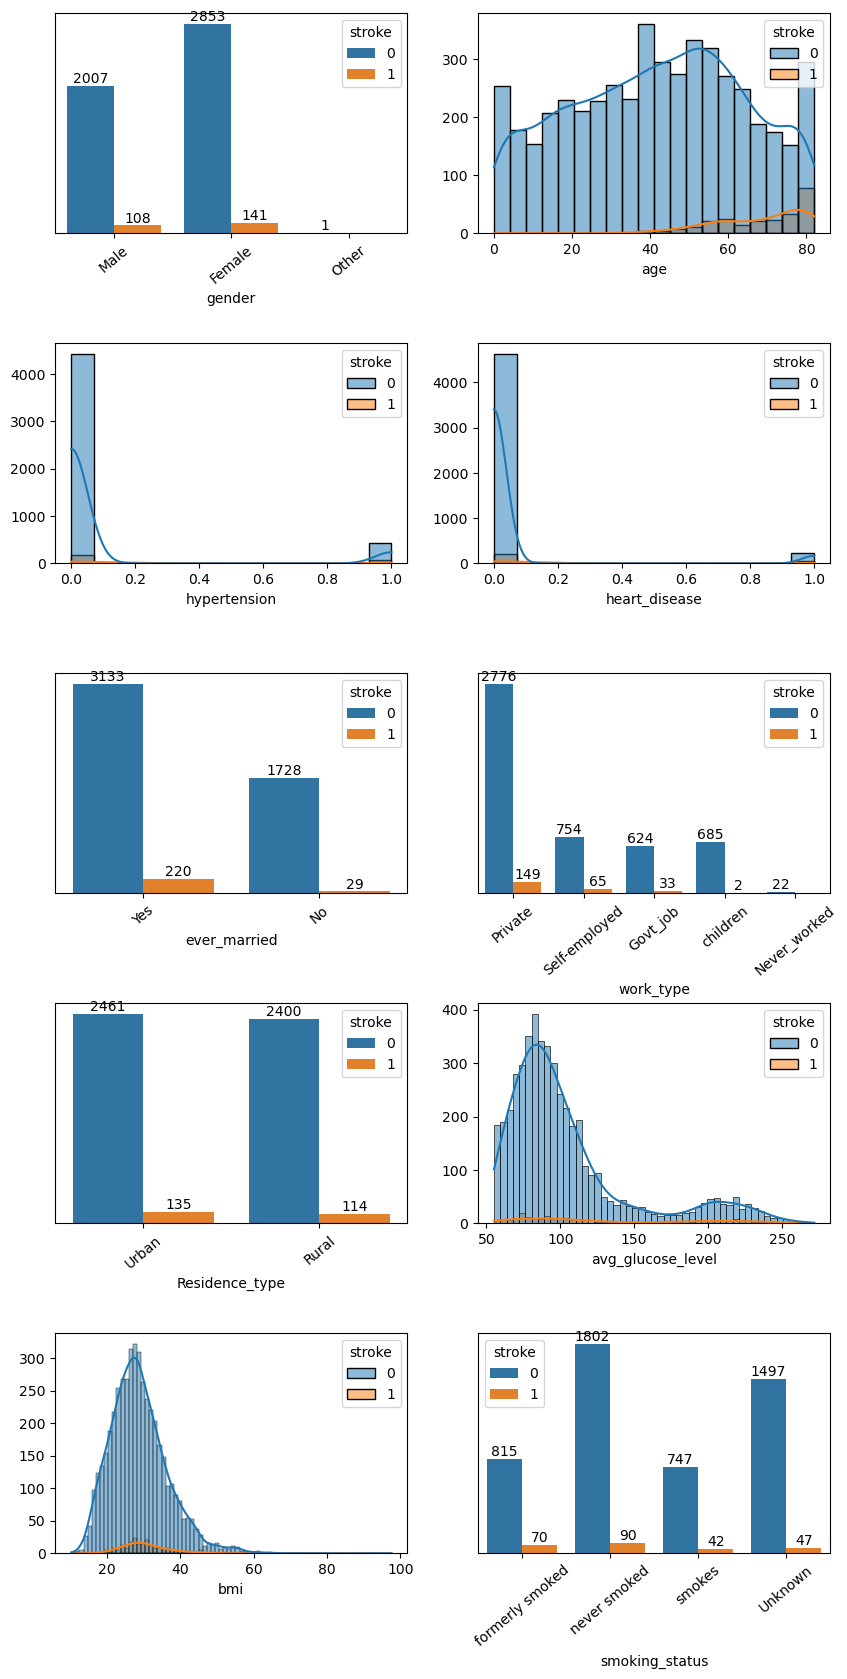

In [105]:
features = list(df.columns)
features.remove('id')
features.remove('stroke')
# num_variables = ['age', 'bmi', 'avg_glucose_level']
# cat_variables = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Plot the features
plt.figure(figsize=(10,20))
c=0
for i in features:
    
    c = features.index(i)+1
    plt.subplot(int(np.ceil(len(features)/2)),2,c)
    plt.subplots_adjust( hspace = 0.5)
    
    if i not in num_variables:
        ax = sns.countplot(x=df[i],hue = df['stroke'])
        ax.bar_label(ax.containers[0])
        ax.bar_label(ax.containers[1])
        ax.set_ylabel(None)
        ax.set_yticks([])
        ax.tick_params(axis='x', rotation=40)
    else:
        sns.histplot(x=df[i],hue = df['stroke'],kde = True).set(ylabel =None)
        
       

### Correlation ###

<Axes: >

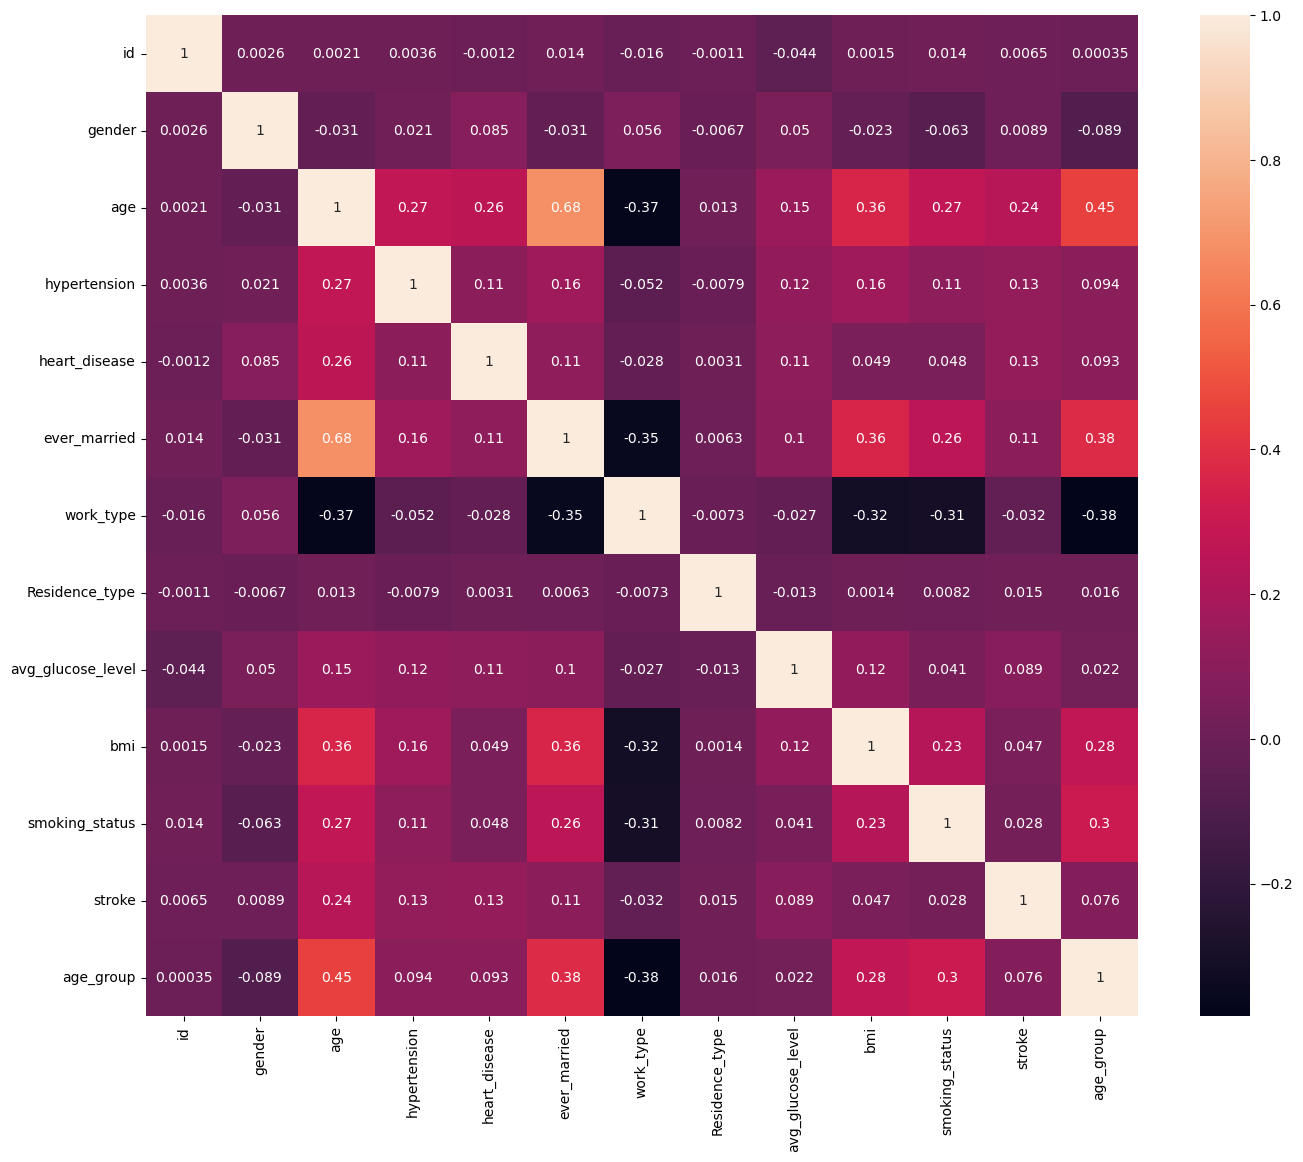

In [141]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
corr =df.copy()
encoder  = LabelEncoder()
for col in corr.columns:
    corr[col] =encoder.fit_transform(corr[col])

plt.figure(figsize=(16,13))
sns.heatmap(data=corr.corr(),annot=True)

<Axes: >

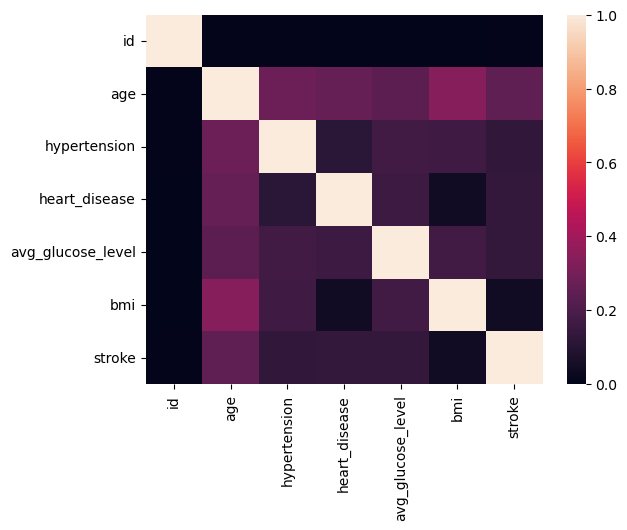

In [135]:
sns.heatmap(df[num_variables].corr())

#### Target variable distribution ####

In [164]:
data = df['stroke'].value_counts()
data

stroke
0    4861
1     249
Name: count, dtype: int64

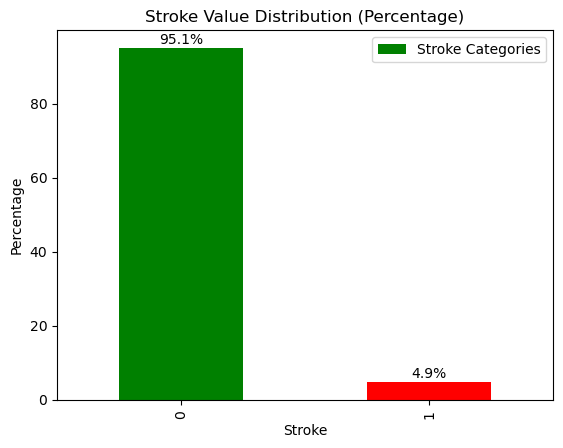

In [184]:
data = df['stroke'].value_counts(normalize=True) * 100
data.plot(kind='bar', color=['green', 'red'])
for index, value in enumerate(data):
    plt.text(index, value + 1, f'{value:.1f}%', ha='center', fontsize=10)
plt.legend(['Stroke Categories'], loc='upper right')
plt.title('Stroke Value Distribution (Percentage)')
plt.xlabel('Stroke')
plt.ylabel('Percentage')
plt.show()


### Upsampling the data ###

In [217]:
from sklearn.utils import resample
had_stroke = df[df["stroke"]==1]
no_stroke = df[df["stroke"]==0]
upsampled_had_stroke = resample(had_stroke,replace=True , n_samples=no_stroke.shape[0] , random_state=123 )
upsampled_data = pd.concat([no_stroke,upsampled_had_stroke])

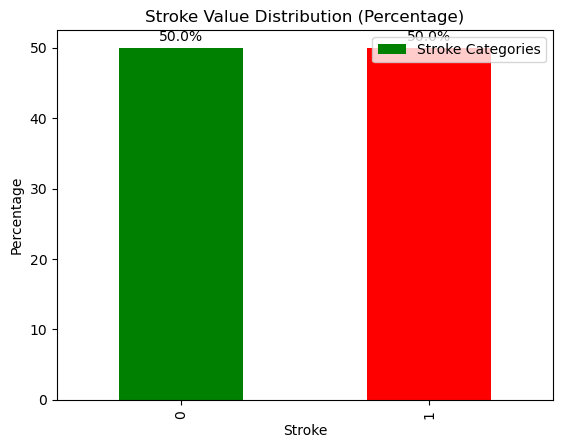

In [219]:
data = upsampled_data['stroke'].value_counts(normalize=True) * 100
data.plot(kind='bar', color=['green', 'red'])
for index, value in enumerate(data):
    plt.text(index, value + 1, f'{value:.1f}%', ha='center', fontsize=10)
plt.legend(['Stroke Categories'], loc='upper right')
plt.title('Stroke Value Distribution (Percentage)')
plt.xlabel('Stroke')
plt.ylabel('Percentage')
plt.show()

In [221]:
# cross_tab = pd.crosstab(df['stroke'], df['gender'])
# cross_tab.plot(kind='bar', stacked=True, colormap='coolwarm')
# plt.title('Stroke Count by Gender')
# plt.xlabel('Stroke')
# plt.ylabel('Count')
# plt.show()


### Data Preprocessing ###

Preparing X and Y variables

In [288]:
X = upsampled_data.drop(columns=['id','stroke','age_group'], axis=1)

In [290]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
249,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown
250,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked
251,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown
252,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked
253,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown


In [292]:
y = upsampled_data['stroke']

In [294]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [296]:
X = preprocessor.fit_transform(X)

In [298]:
X.shape

(9722, 21)

In [300]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((7777, 21), (1945, 21))

### Create an Evaluate Function to give all metrics after model Training ###

In [303]:
def evaluate_model(true, predicted):
    # Calculate classification metrics
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted, average='weighted')  # Adjust average as needed
    recall = recall_score(true, predicted, average='weighted')
    f1 = f1_score(true, predicted, average='weighted')
    cm = confusion_matrix(true, predicted)
    
    # Return all metrics
    return accuracy, precision, recall, f1, cm


In [305]:
models = {
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    #"XGBClassifier": XGBClassifier(),
    #"CatBoost Classifier": CatBoostClassifier(),
}

model_list = []
Accuracy_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_accuracy, model_train_precision, model_train_recall, model_train_f1, train_cm = evaluate_model(y_train, y_train_pred)
    
    model_test_accuracy, model_test_precision, model_test_recall, model_test_f1, test_cm = evaluate_model(y_test, y_test_pred)
    
    # Print model name
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    # Model performance for Training set
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- F1 Score: {:.4f}".format(model_train_f1))
    print("Confusion Matrix:\n", train_cm)
    
    print('----------------------------------')
    
    # Model performance for Test set
    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- F1 Score: {:.4f}".format(model_test_f1))
    print("Confusion Matrix:\n", test_cm)
    
    # Append the F1-score or accuracy to the list for comparison
    Accuracy_list.append(model_test_accuracy)
    
    print('='*35)
    print('\n')


K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.9495
- Precision: 0.9541
- Recall: 0.9495
- F1 Score: 0.9493
Confusion Matrix:
 [[3475  393]
 [   0 3909]]
----------------------------------
Model performance for Test set
- Accuracy: 0.9290
- Precision: 0.9380
- Recall: 0.9290
- F1 Score: 0.9288
Confusion Matrix:
 [[855 138]
 [  0 952]]


Decision Tree Classifier
Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000
Confusion Matrix:
 [[3868    0]
 [   0 3909]]
----------------------------------
Model performance for Test set
- Accuracy: 0.9722
- Precision: 0.9737
- Recall: 0.9722
- F1 Score: 0.9722
Confusion Matrix:
 [[939  54]
 [  0 952]]


Random Forest Classifier
Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000
Confusion Matrix:
 [[3868    0]
 [   0 3909]]
----------------------------------
Model performance for Test set
- Accuracy: 0.9877
- Pr

### Results ###

In [308]:
pd.DataFrame(list(zip(model_list, Accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=["Accuracy"],ascending=False)


,Model Name,Accuracy
2,Random Forest Classifier,0.987661
1,Decision Tree Classifier,0.972237
0,K-Neighbors Classifier,0.929049
3,AdaBoost Classifier,0.816967


#### Random Forest ####

In [318]:
rf_model = RandomForestClassifier()
rf_model = rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %acc)

 Accuracy of the model is 98.66


#### Feature Importance ####

In [320]:
# for i in range(len(model['Random Forest Classifier'].feature_importances_)):
#     a = model['Random Forest Classifier'].feature_importances_[i]*100
#     print(f'{a:.2f}% kolom : {col[i]}')
